In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from IPython.display import display
import mglearn
import graphviz

import sys, warnings
%matplotlib inline

In [2]:
print(plt.rcParams['font.family'])
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
import seaborn as sns

['sans-serif']


# 데이터 정의

In [3]:
cs = pd.read_csv('train_clickstreams.tab', sep='\t', encoding='cp949')
cs_test=pd.read_csv('test_clickstreams.tab', sep='\t', encoding='cp949')

In [8]:
cs.MACT_NM.unique()

array(['검색', '블로그/SNS', '일간지', '인터넷신문', '온라인게임', '전문뉴스', '웹서비스', '커뮤니케이션',
       '학생/교과교육', '게임포털', '포털', '영화', '만화/애니메이션', '커뮤니티포털', '모바일컨텐츠',
       '종합쇼핑', '멀티미디어/동영상', '가격비교', '분야별커뮤니티', '골프', '생활', '솔루션',
       '어린이커뮤니티', '성인/전문교육', '다운로드', '학술정보', '부동산', '학원', '소프트웨어',
       '유머/재미', '여행정보', '쇼핑정보', '전문병원', '취미/스포츠 쇼핑몰', '건강/의학정보', '운세',
       '산업용품 쇼핑몰', '보험', '자동차', '숙박', '의류 쇼핑몰', '인터넷비즈니스', '음악', '방송',
       '화장품/미용 쇼핑몰', '잡지/웹진', '교육자료', '공공서비스', '지불/결제', '도메인/호스팅', '명품',
       '종교', '무역', '금융', '운송', '데스크탑', '어학교육', '게임방송', '취업', '광고/마케팅',
       '아이템거래', '증권/주식', '쇼핑기타', '패션잡화 쇼핑몰', '게임전문지/웹진', 'B2B', '정부/기관',
       '도서/음반/악기 쇼핑몰', '생활용품 쇼핑몰', '하드웨어', '통신사', '법/법률', '가전 쇼핑몰',
       '지방자치', '무선/이동통신', '종합유통', 'SaaS/ASP', '인터넷방송', '여성커뮤니티', '음/식료품',
       '컨설팅', '사회복지', '야구', '여행사', '연예인/스타', '예술', '가구/인테리어 쇼핑몰',
       '식품/건강 쇼핑몰', '창업/프랜차이즈', '은행', '사무관리', '교통', '도박', '통신 쇼핑몰',
       '게임정보', '유아교육', '자산관리/운용', '가정용품', '전기/전자', '유아/어린이 쇼핑몰', '경제',
       '선거', '프로

In [47]:
cs.to_csv("cs2.csv",encoding='cp949')

In [48]:
cs_test.head(1)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,월,연도,일,시간,요일,시간대,연월일,SNS,MAN,WOMAN
0,2501,2012082012,search.naver.com,2.0,40.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,8,2012,20,12,월요일,오후,20120820,0.0,0.0,0.0


In [49]:
cs_test.to_csv("cs2test.csv",encoding='cp949')

In [4]:
sk=pd.read_csv('train_searchkeywords.tab', sep='\t', encoding='cp949')
sk_test=pd.read_csv('test_searchkeywords.tab', sep='\t', encoding='cp949')

C:\Users\xcv90\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cs.head(2)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색
1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS


In [6]:
pf = pd.read_csv("train_profiles.csv")
def f(x):
    return x[0]
pf['GENDER'] = pf.GROUP.apply(f)
pf.head(1)

,CUS_ID,GROUP,GENDER
0,1,M40+,M


In [1]:
all = pd.merge(cs,pf,on='CUS_ID',how='inner')
all.head(1)

NameError: name 'pd' is not defined

EDA

In [228]:
all.head(1)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,GROUP,GENDER
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,M40+,M


In [8]:
n=all.groupby("CUS_ID")["ST_TIME","GROUP"]
cs['월']=cs.TIME_ID%1000000//10000
cs_test['월']=cs_test.TIME_ID%1000000//10000

In [269]:
cs.head(1)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,월
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,7


In [284]:
n1=all.query("GROUP=='M40+'").query("월=='5'")["ST_TIME"].sum()
n2=all.query("GROUP=='F20-'").query("월=='5'")["ST_TIME"].sum()

In [285]:
print(n1,n2)

23252910.0 6925512.0


In [263]:
n1=all.query("월=='1'")["ST_TIME"].sum()
n2=all.query("월=='1'")["ST_TIME"].sum()
n3=all.query("월=='1'")["ST_TIME"].sum()
n4=all.query("월=='1'")["ST_TIME"].sum()
n5=all.query("월=='1'")["ST_TIME"].sum()
n6=all.query("월=='1'")["ST_TIME"].sum()
n6=all.query("월=='1'")["ST_TIME"].sum()
n6=all.query("월=='1'")["ST_TIME"].sum()
n6=all.query("월=='1'")["ST_TIME"].sum()
n6=all.query("월=='1'")["ST_TIME"].sum()
n6=all.query("월=='1'")["ST_TIME"].sum()

In [264]:
print(n1,n2,n3,n4,n5,n6)

139.6947117561414 142.571772569651 131.20323011924245 137.8026125700714 128.5251109453101 125.02080768580878


In [ ]:
#평일 , 주말 

In [267]:
week = cs.gropuby("CUS_ID").query("요일==['토요일','일요일']").ST_TIME.sum()
hol=cs.gropuby("CUS_ID").query("요일==['월요일','화요일','수요일','목요일','금요일']").ST_TIME.sum()
# 요일 빼고 주말 , 평일로 

AttributeError: 'DataFrame' object has no attribute 'gropuby'

## EDA

In [6]:
all.head(1)

AttributeError: 'builtin_function_or_method' object has no attribute 'head'

In [35]:
pivot_BACT_NM = pd.pivot_table(data = all, columns = 'GROUP', index  ='시간대', values='SITE_CNT',aggfunc='sum')


In [23]:
all.head(1)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,GROUP,GENDER
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,M40+,M


In [33]:
pivot2_BACT_NM = pd.pivot_table(data = all, columns = 'GROUP', index  ='시간대', values='ST_TIME',aggfunc='sum')


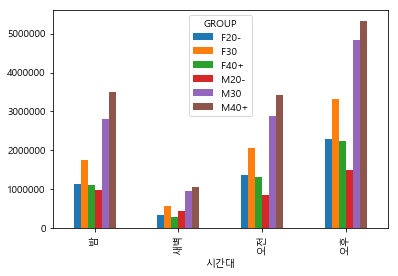

In [36]:
pivot_BACT_NM.plot.bar()

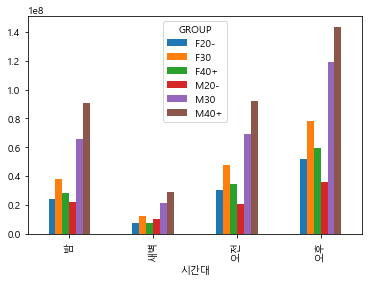

In [34]:
pivot2_BACT_NM.plot.bar()

In [65]:
pivot2_MACT_NM["ST_TIMEv"] = pivot2_MACT_NM/m.values()

TypeError: 'numpy.ndarray' object is not callable

In [66]:
pivot2_MACT_NM = pd.pivot_table(data = all, columns = 'GROUP', index  ='MACT_NM', values='ST_TIME',aggfunc='mean')


In [ ]:

#M40+ 가전 ,인터넷신문, 일간지,전문뉴스 - 그냥 site_Tiem
#F30 성인 ,임신/출산 ,입찰 -mean
#M30 기업금융, 게임대회/리그,교사/교수 -mean
#F40+ 문학,비디오게임,예술,경제
#F20- 연예인/스타 ,약학
#M20- 자연과학


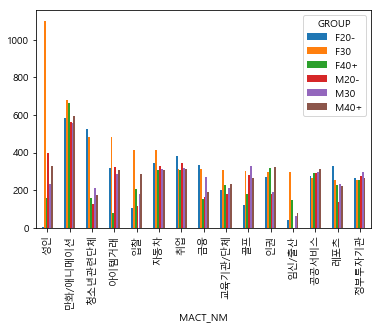

In [84]:
pivot2_MACT_NM.sort_values(by="F30",ascending=False).head(15).plot.bar()

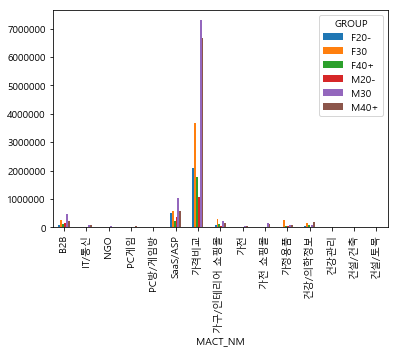

In [39]:
pivot2_MACT_NM.sort_values(by="MACT_NM",ascending=True).head(15).plot.bar()

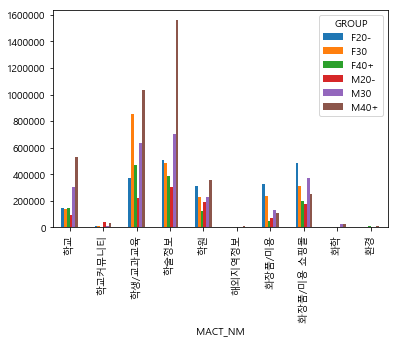

In [42]:
pivot2_MACT_NM.sort_values(by="MACT_NM",ascending=True).tail(10).plot.bar()

In [95]:
pivot_SITE_NM = pd.pivot_table(data = all, columns = 'GROUP', index  ='SITE_NM', values='ST_TIME',aggfunc='sum')


In [87]:
pivot_SITE_NM=pivot_SITE_NM.fillna(0)
pivot_SITE_NM.head(3)


GROUP,F20-,F30,F40+,M20-,M30,M40+
SITE_NM,,,,,,
드림앤락,3.0,0.0,0.0,0.0,0.000000,0.0
아이비즈투어,0.0,0.0,60.0,0.0,0.000000,0.0
애인드,0.0,0.0,0.0,0.0,249.714286,0.0


In [ ]:
# 20대 남녀 캅스파, 디피지샵, 실버카페,과학기술정보통합기술
        리치옥션 , 수박씨닷컴 ,엘지에이치샵
# 30대 남녀,이케이옥션,재미나넷
  밤문화 기행기, 주크박스

# 40대 남녀
다음 , 다음 메일, 미디어다음 
youtube / 페이스북

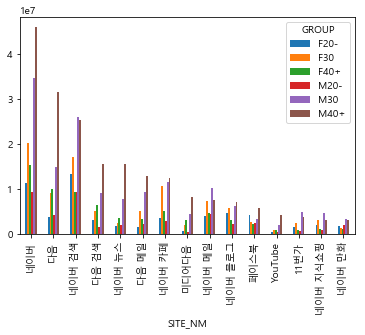

In [96]:
pivot_SITE_NM.sort_values(by="M40+",ascending=False).head(15).plot.bar()

In [100]:
pivot_ACT_NM = pd.pivot_table(data = all, columns = 'GROUP', index  ='ACT_NM', values='SITE_CNT',aggfunc='sum')


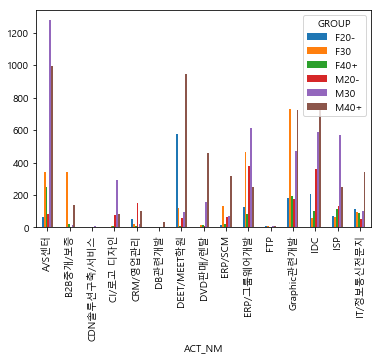

In [101]:
pivot_ACT_NM.head(15).plot.bar()

In [102]:
pivot_ACT_NM = pd.pivot_table(data = all, columns = 'GROUP', index  ='ACT_NM', values='ST_TIME',aggfunc='sum')


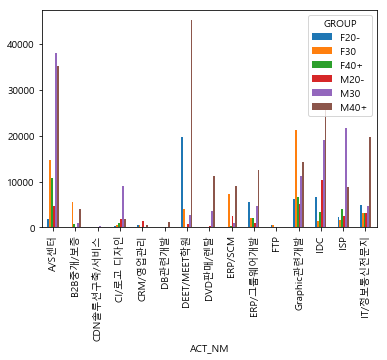

In [103]:
pivot_ACT_NM.head(15).plot.bar()

# cs 데이터 전처리

- 시간별 column 추가 / cs , cs.test

In [9]:
cs['연도']=cs.TIME_ID//1000000
cs_test['연도']=cs_test.TIME_ID//1000000
cs['월']=cs.TIME_ID%1000000//10000
cs_test['월']=cs_test.TIME_ID%1000000//10000
cs['일']=cs.TIME_ID%10000//100
cs_test['일']=cs_test.TIME_ID%10000//100
cs['시간']=cs.TIME_ID%100
cs_test['시간']=cs_test.TIME_ID%100

#요일 
a=cs.TIME_ID//100
b=cs_test.TIME_ID//100
cs['요일']=pd.to_datetime(a.astype(str)).dt.weekday.map({0:'월요일',1:'화요일',2:'수요일',3:'목요일',4:'금요일',5:'토요일',6:'일요일'})
cs_test['요일']=pd.to_datetime(b.astype(str)).dt.weekday.map({0:'월요일',1:'화요일',2:'수요일',3:'목요일',4:'금요일',5:'토요일',6:'일요일'})
#시간대
def time(x):
    if (0<=x<=5):
        return "새벽"
    elif (6<=x<=11):
        return "오전"
    elif (12<=x<=17):
        return "오후"
    elif (18<=x<=23):
        return "밤"
cs['시간대']=cs.시간.apply(time)
cs_test['시간대']=cs_test.시간.apply(time)

cs['연월일']=cs.TIME_ID//100           
cs_test['연월일']=cs_test.TIME_ID//100

In [46]:
pd.to_csv("cs2.csv")

AttributeError: module 'pandas' has no attribute 'to_csv'

# 변수 생성 , a,b-- 

In [10]:
# 아이디, 중분류 별 사이트 체류 시간
a=pd.pivot_table(cs, index="CUS_ID", columns="BACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
a1=a.drop("CUS_ID", axis=1) #axis 는 columns 를 의미
a2= a1.div(a1.sum(axis=1),axis=0) # id 빼고 나눈후 id 다시 붙이기 
a2['CUS_ID']=a.CUS_ID 

a_test=pd.pivot_table(cs_test, index="CUS_ID", columns="BACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
a1_test=a_test.drop("CUS_ID", axis=1)
a2_test= a1_test.div(a1_test.sum(axis=1),axis=0)
a2_test['CUS_ID']=a_test.CUS_ID 
                        

In [13]:
# 아이디 , 중분류 별 사이트 클릭 횟수 
b=pd.pivot_table(cs, index="CUS_ID", columns="BACT_NM", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
b1=b.drop("CUS_ID", axis=1)
b2= b1.div(b1.sum(axis=1),axis=0)
b2['CUS_ID']=b.CUS_ID

b_test=pd.pivot_table(cs_test, index="CUS_ID", columns="BACT_NM", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
b1_test=b_test.drop("CUS_ID", axis=1)
b2_test= b1_test.div(b1_test.sum(axis=1),axis=0)
b2_test['CUS_ID']=b_test.CUS_ID

In [99]:
b2_test.head(2)

BACT_NM,건강/의학,게임,교육/학원,금융/부동산,뉴스/미디어,문학/예술,비즈니스/경제,사회/문화/종교,생활/가정/취미,서비스,...,여행,온라인교육,유통/판매/운송,인터넷/컴퓨터,정보통신/IT,정치/행정,제조,커뮤니티,학문,CUS_ID
0,0.000179,0.000000,0.000359,0.045001,0.072252,0.000000,0.00006,0.0,0.000179,0.009741,...,0.003287,0.007171,0.006096,0.508875,0.003227,0.007171,0.001016,0.204865,0.0,2501
1,0.000392,0.000245,0.000245,0.039037,0.048060,0.000638,0.00206,0.0,0.001079,0.004953,...,0.000049,0.001618,0.000147,0.438478,0.009710,0.004463,0.003139,0.025845,0.0,2502


In [11]:
# 월별 체류시간 
c=pd.pivot_table(cs, index="CUS_ID", columns="월", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
c1=c.drop("CUS_ID", axis=1)
c2= c1.div(c1.sum(axis=1),axis=0)
c2['CUS_ID']=c.CUS_ID

c_test=pd.pivot_table(cs_test, index="CUS_ID", columns="월", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
c1_test=c_test.drop("CUS_ID", axis=1)
c2_test= c1_test.div(c1_test.sum(axis=1),axis=0)
c2_test['CUS_ID']=c_test.CUS_ID 

In [15]:
# 월별 페이지 뷰 
d=pd.pivot_table(cs, index="CUS_ID", columns="월", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
d1=d.drop("CUS_ID", axis=1)
d2= d1.div(d1.sum(axis=1),axis=0)
d2['CUS_ID']=d.CUS_ID
d_test=pd.pivot_table(cs_test, index="CUS_ID", columns="월", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
d1_test=d_test.drop("CUS_ID", axis=1)
d2_test= d1_test.div(d1_test.sum(axis=1),axis=0)
d2_test['CUS_ID']=d_test.CUS_ID 

In [12]:
#요일별 체류시간

e=pd.pivot_table(cs, index="CUS_ID", columns="요일", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
e["평일"]=e["월요일"]+e["화요일"]+e["수요일"]+e["목요일"]+e["금요일"]
e["주말"]=e["토요일"]+e["일요일"]
e=e.drop(columns=["월요일","화요일","수요일","목요일","금요일","토요일","일요일"])
e1=e.drop("CUS_ID", axis=1)
e2= e1.div(e1.sum(axis=1),axis=0)
e2['CUS_ID']=e.CUS_ID

e_test=pd.pivot_table(cs_test, index="CUS_ID", columns="요일", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
e_test["평일"]=e_test["월요일"]+e_test["화요일"]+e_test["수요일"]+e_test["목요일"]+e_test["금요일"]
e_test["주말"]=e_test["토요일"]+e_test["일요일"]
e_test=e_test.drop(columns=["월요일","화요일","수요일","목요일","금요일","토요일","일요일"])
e1_test=e_test.drop("CUS_ID", axis=1)
e2_test= e1_test.div(e1_test.sum(axis=1),axis=0)
e2_test['CUS_ID']=e_test.CUS_ID 

In [17]:
# 요일별 페이지 뷰 
f=pd.pivot_table(cs, index="CUS_ID", columns="요일", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
f1=f.drop("CUS_ID", axis=1)
f2= f1.div(f1.sum(axis=1),axis=0)
f2['CUS_ID']=f.CUS_ID

f_test=pd.pivot_table(cs_test, index="CUS_ID", columns="요일", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
f1_test=f_test.drop("CUS_ID", axis=1)
f2_test= f1_test.div(f1_test.sum(axis=1),axis=0)
f2_test['CUS_ID']=f_test.CUS_ID 

In [13]:
# 시간대별 페이지 뷰 + 체류시간
g=pd.pivot_table(cs, index="CUS_ID", columns="시간대", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
g1=g.drop("CUS_ID", axis=1)
g2= g1.div(g1.sum(axis=1),axis=0)
g2['CUS_ID']=g.CUS_ID
g_test=pd.pivot_table(cs_test, index="CUS_ID", columns="시간대", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
g1_test=g_test.drop("CUS_ID", axis=1)
g2_test= g1_test.div(g1_test.sum(axis=1),axis=0)
g2_test['CUS_ID']=g_test.CUS_ID 



In [44]:
#MACT_NM별 체류시간 & 페이지 뷰 
i=pd.pivot_table(cs, index="CUS_ID", columns="MACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
i1=i.drop("CUS_ID", axis=1)
i2= i1.div(i1.sum(axis=1),axis=0)
i2['CUS_ID']=i.CUS_ID
i_test=pd.pivot_table(cs_test, index="CUS_ID", columns="MACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
i1_test=i_test.drop("CUS_ID", axis=1)
i2_test= i1_test.div(i1_test.sum(axis=1),axis=0)
i2_test['CUS_ID']=i_test.CUS_ID   

j=pd.pivot_table(cs, index="CUS_ID", columns="MACT_NM", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
j1=j.drop("CUS_ID", axis=1)
j2= j1.div(j1.sum(axis=1),axis=0)
j2['CUS_ID']=j.CUS_ID

j_test=pd.pivot_table(cs_test, index="CUS_ID", columns="MACT_NM", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
j1_test=j_test.drop("CUS_ID", axis=1)
j2_test= j1_test.div(j1_test.sum(axis=1),axis=0)
j2_test['CUS_ID']=j_test.CUS_ID        

In [14]:
#ACT_NM별 체류시간 , 페이지 뷰 K
k=pd.pivot_table(cs, index="CUS_ID", columns="ACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
k_test=pd.pivot_table(cs, index="CUS_ID", columns="ACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
l=pd.pivot_table(cs, index="CUS_ID", columns="ACT_NM", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()
l_test=pd.pivot_table(cs, index="CUS_ID", columns="ACT_NM", values="SITE_CNT", aggfunc=sum, fill_value=0).reset_index()

In [23]:
> # 전처리 , 만약에 test에만 있으면 안되니까 
put1=[]
put2=[]
put3=[]
put4=[]
for i in k.columns:
    if i not in k_test.columns:
        put1.append(i)
for i in k_test.columns:
    if i not in k.columns:
        put2.append(i)
for i in l_test.columns:
    if i not in l.columns:
        put3.append(i)
for i in l_test.columns:
    if i not in l.columns:
        put4.append(i)

In [25]:
k=k.drop(put1, axis=1)
k_test=k_test.drop(put2, axis=1)
l=l.drop(put3, axis=1)
l_test=l_test.drop(put4, axis=1)

k1=k.drop("CUS_ID", axis=1)
k2= k1.div(k1.sum(axis=1),axis=0)
k2['CUS_ID']=k.CUS_ID

k1_test=k_test.drop("CUS_ID", axis=1)
k2_test= k1_test.div(k1_test.sum(axis=1),axis=0)
k2_test['CUS_ID']=k_test.CUS_ID   

l1=l.drop("CUS_ID", axis=1)
l2= l1.div(l1.sum(axis=1),axis=0)
l2['CUS_ID']=l.CUS_ID

l1_test=l_test.drop("CUS_ID", axis=1)
l2_test= l1_test.div(l1_test.sum(axis=1),axis=0)
l2_test['CUS_ID']=l_test.CUS_ID

In [15]:
q1w2=[]
for column in k.columns:
    if column not in k_test.columns:
        q1w2.append(column)
q1w2e3=[]
for column in k_test.columns:
    if column not in k.columns:
        q1w2e3.append(column)
#q1w2e3r4=[]
#for column in l.columns:
 #   if column not in l_test.columns:
        q1w2e3r4.append(column)
#q1w2e3r4t5=[]
#for column in l_test.columns:
#    if column not in l.columns:
 #       q1w2e3r4t5.append(column)

k=k.drop(q1w2, axis=1)
k_test=k_test.drop(q1w2e3, axis=1)


k1=k.drop("CUS_ID", axis=1)
k2= k1.div(k1.sum(axis=1),axis=0)
k2['CUS_ID']=k.CUS_ID

k1_test=k_test.drop("CUS_ID", axis=1)
k2_test= k1_test.div(k1_test.sum(axis=1),axis=0)
k2_test['CUS_ID']=k_test.CUS_ID 

> 이제 변동

In [28]:
#카테고리별 체류시간 & 페이지뷰 s,m , 변동계수
aa1=a.apply(lambda x: np.std(x), axis=1)
aa1_test=a_test.apply(lambda x: np.std(x), axis=1)                             
aa2=a.apply(lambda x: np.mean(x), axis=1)
aa2_test=a_test.apply(lambda x: np.mean(x), axis=1)                   
aa3=aa1/aa2
aa3_test=aa1_test/aa2_test    

bb1=b.apply(lambda x: np.std(x), axis=1)
bb1_test=b_test.apply(lambda x: np.std(x), axis=1)                              
bb2=b.apply(lambda x: np.mean(x), axis=1)
bb2_test=b_test.apply(lambda x: np.mean(x), axis=1)                    
bb3=bb1/bb2
bb3_test=bb1_test/bb2_test  

In [29]:
# 월별 , 일별 , 요일별 , 시간대별 체류시간&페이지뷰
cc1=c.apply(lambda x: np.std(x), axis=1)
cc1_test=c_test.apply(lambda x: np.std(x), axis=1)                              #월별 체류시간 표준편차
cc2=c.apply(lambda x: np.mean(x), axis=1)
cc2_test=c_test.apply(lambda x: np.mean(x), axis=1)                    #월별 체류시간 평균
cc3=cc1/cc2
cc3_test=cc1_test/cc2_test 

dd1=d.apply(lambda x: np.std(x), axis=1)
dd1_test=d_test.apply(lambda x: np.std(x), axis=1)                              #월별 페이지뷰 표준편차
dd2=d.apply(lambda x: np.mean(x), axis=1)
dd2_test=d_test.apply(lambda x: np.mean(x), axis=1)                    #월별 페이지뷰 평균
dd3=dd1/dd2
dd3_test=dd1_test/dd2_test   

ee1=e.apply(lambda x: np.std(x), axis=1)
ee1_test=e_test.apply(lambda x: np.std(x), axis=1)                              #요일별 체류시간 표준편차
ee2=e.apply(lambda x: np.mean(x), axis=1)
ee2_test=e_test.apply(lambda x: np.mean(x), axis=1)                    #요일별 체류시간 평균
ee3=ee1/ee2
ee3_test=ee1_test/ee2_test 

ff1=f.apply(lambda x: np.std(x), axis=1)
ff1_test=f_test.apply(lambda x: np.std(x), axis=1)                              #요일별 페이지뷰 표준편차
ff2=f.apply(lambda x: np.mean(x), axis=1)
ff2_test=f_test.apply(lambda x: np.mean(x), axis=1)                    #요일별 페이지뷰 평균
ff3=ff1/ff2
ff3_test=ff1_test/ff2_test 

gg1=g.apply(lambda x: np.std(x), axis=1)
gg1_test=g_test.apply(lambda x: np.std(x), axis=1)                              #시간대별 체류시간 표준편차
gg2=g.apply(lambda x: np.mean(x), axis=1)
gg2_test=g_test.apply(lambda x: np.mean(x), axis=1)                    #시간대별 체류시간 평균
gg3=gg1/gg2
gg3_test=gg1_test/gg2_test 

hh1=h.apply(lambda x: np.std(x), axis=1)
hh1_test=h_test.apply(lambda x: np.std(x), axis=1)                              #시간대별 페이지뷰 표준편차
hh2=h.apply(lambda x: np.mean(x), axis=1)
hh2_test=h_test.apply(lambda x: np.mean(x), axis=1)                    #시간대별 페이지뷰 평균
hh3=hh1/hh2
hh3_test=hh1_test/hh2_test 



In [45]:
#MACT 별 체류시간 & 페이지 뷰 
ii1=i.apply(lambda x: np.std(x), axis=1)
ii1_test=i_test.apply(lambda x: np.std(x), axis=1)                              #MACT별 체류시간 표준편차
ii2=i.apply(lambda x: np.mean(x), axis=1)
ii2_test=i_test.apply(lambda x: np.mean(x), axis=1)                  
ii3=ii1/ii2
ii3_test=ii1_test/ii2_test 

jj1=j.apply(lambda x: np.std(x), axis=1)
jj1_test=j_test.apply(lambda x: np.std(x), axis=1)                              #MACT별 페이지뷰 표준편차
jj2=j.apply(lambda x: np.mean(x), axis=1)
jj2_test=j_test.apply(lambda x: np.mean(x), axis=1)                    
jj3=jj1/jj2
jj3_test=jj1_test/jj2_test   

In [35]:
#ACT 별 체류시간 & 페이지뷰 
kk1=k.apply(lambda x: np.std(x), axis=1)
kk1_test=k_test.apply(lambda x: np.std(x), axis=1)  
kk2=k.apply(lambda x: np.mean(x), axis=1)
kk2_test=k_test.apply(lambda x: np.mean(x), axis=1)                    
kk3=kk1/kk2
kk3_test=kk1_test/kk2_test   

ll1=l.apply(lambda x: np.std(x), axis=1)
ll1_test=l_test.apply(lambda x: np.std(x), axis=1)                              #ACT별 페이지뷰 표준편차
ll2=l.apply(lambda x: np.mean(x), axis=1)
ll2_test=l_test.apply(lambda x: np.mean(x), axis=1)                    #ACT별 페이지뷰 평균
ll3=ll1/ll2
ll3_test=ll1_test/ll2_test     

In [36]:
# 총 체류시간 , 페이지뷰
m=cs.groupby("CUS_ID")["ST_TIME"].sum()
m_test=cs_test.groupby("CUS_ID")["ST_TIME"].sum()         
n=cs.groupby("CUS_ID")['SITE_CNT'].sum()
n_test=cs_test.groupby("CUS_ID")['SITE_CNT'].sum() 
#서로 다른 사이트 
o=cs.groupby("CUS_ID")['SITE_NM'].nunique()
o_test=cs_test.groupby("CUS_ID")['SITE_NM'].nunique()
p=cs.groupby("CUS_ID")['BACT_NM'].nunique()
p_test=cs_test.groupby("CUS_ID")['BACT_NM'].nunique() 
q=cs.groupby("CUS_ID")["연월일"].nunique()
q_test=cs_test.groupby("CUS_ID")["연월일"].nunique() 
r=m/q
r_test=m_test/q_test 

In [37]:
#만든 변수들 합치기 

ab=pd.merge(a2, b2, on="CUS_ID")
cd=pd.merge(c2, d2, on="CUS_ID")
ef=pd.merge(e2, f2, on="CUS_ID")
gh=pd.merge(g2, h2, on="CUS_ID")
ij=pd.merge(i2, j2, on="CUS_ID")
kl=pd.merge(k2, l2, on="CUS_ID")
ab_test=pd.merge(a2_test, b2_test, on="CUS_ID")
cd_test=pd.merge(c2_test, d2_test, on="CUS_ID")
ef_test=pd.merge(e2_test, f2_test, on="CUS_ID")
gh_test=pd.merge(g2_test, h2_test, on="CUS_ID")
ij_test=pd.merge(i2_test, j2_test, on="CUS_ID")
kl_test=pd.merge(k2_test, l2_test, on="CUS_ID")

In [16]:
ce=pd.merge(c2, e2, on="CUS_ID")
ag=pd.merge(a2, g2, on="CUS_ID") #ij 제외 
kl=pd.merge(k2, ag, on="CUS_ID")
ce_test=pd.merge(c2_test, e2_test, on="CUS_ID")
ag_test=pd.merge(g2_test, a2_test, on="CUS_ID")
kl_test=pd.merge(k2_test, ag_test, on="CUS_ID")

In [17]:
act_w = pd.read_csv("actw2v.csv",encoding="UTF-8")
act_tw = pd.read_csv("actw2v_t.csv",encoding="UTF-8")

mact_w = pd.read_csv("mactw2v.csv",encoding="UTF-8")
mact_tw = pd.read_csv("mactw2v_t.csv",encoding="UTF-8")

bact_w = pd.read_csv("bactw2v.csv",encoding="UTF-8")
bact_tw = pd.read_csv("bactw2v_t.csv",encoding="UTF-8")

site_w = pd.read_csv("namew2v.csv",encoding="UTF-8")
site_tw = pd.read_csv("namew2v_t.csv",encoding="UTF-8")

In [18]:
finalX=pd.merge(act_w,mact_w, on="CUS_ID")

finalX=pd.merge(bact_w,finalX, on="CUS_ID")

finalX=pd.merge(site_w,finalX, on="CUS_ID")

finalX.head(2)

,nM40+,nM30,nF30,nF40+,nF20-,nM20-,CUS_ID,bM40+,bM30,bF30,...,aF30,aF40+,aF20-,aM20-,mM40+,mM30,mF30,mF40+,mF20-,mM20-
0,0.258779,0.104072,-0.012115,0.082049,0.067212,0.029104,1,-0.067102,-0.036729,-0.037393,...,-0.060013,-0.035398,0.010963,0.028404,-0.168828,-0.004995,0.014014,0.141313,-0.000062,-0.111026
1,0.038754,0.152332,0.142827,0.044508,0.209852,0.092025,2,-0.019582,-0.021473,-0.046755,...,0.116926,0.001115,0.132733,0.090044,-0.181137,-0.005767,0.019706,0.129198,-0.001828,-0.125021


In [21]:
cs.BACT_NM.nunique()

22

In [19]:
finalX_test=pd.merge(act_tw,mact_tw, on="CUS_ID")
finalX_test=pd.merge(finalX_test,bact_tw, on="CUS_ID")
finalX_test=pd.merge(finalX_test,site_tw, on="CUS_ID")
finalX_test.head(2)

,CUS_ID,aM40+,aM30,aF30,aF40+,aF20-,aM20-,mM40+,mM30,mF30,...,bF30,bF40+,bF20-,bM20-,nM40+,nM30,nF30,nF40+,nF20-,nM20-
0,2501,0.017916,0.068811,0.129829,-0.003272,0.036803,0.01308,-0.181593,0.005909,0.015642,...,-0.059042,-0.036987,-0.044219,-0.002320,0.124788,0.130617,0.253417,0.095580,0.164164,0.088148
1,2502,0.007820,0.082053,0.108419,-0.018745,0.085200,0.00460,-0.181061,-0.017387,0.008521,...,-0.043119,-0.019627,-0.045456,-0.022927,0.168346,0.141849,0.170438,0.065185,0.088103,0.055976


In [22]:
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()
sns = cs.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns = sns/time
cs["SNS"] = sns
cs = cs.fillna(0)

time_t = cs_test.groupby(['CUS_ID'])["ST_TIME"].sum()
sns_t = cs_test.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns_t = sns_t/time
cs_test["SNS"] = sns_t
cs_test = cs_test.fillna(0)

man = cs.query("ACT_NM==['스포츠베팅','남성의류쇼핑몰','자동차정보','비뇨기과']").ST_TIME
man = sns/time
cs["MAN"] = man


man_t = cs_test.query("ACT_NM==['스포츠베팅','남성의류쇼핑몰','자동차정보','비뇨기과']").ST_TIME
man_t = man_t/time_t
cs_test["MAN"] = man_t


In [23]:
woman = cs.query("ACT_NM==['여성의류쇼핑몰' , '화장품브랜드쇼핑몰' , '폰트/서체 ','임부복쇼핑몰']").ST_TIME
woman = woman/time
cs["WOMAN"] = woman
cs=cs.fillna(0)


woman_t = cs_test.query("ACT_NM==['여성의류쇼핑몰' , '화장품브랜드쇼핑몰' , '폰트/서체 ','임부복쇼핑몰']").ST_TIME
woman_t = woman_t/time_t
cs_test["WOMAN"] = woman_t
cs_test = cs_test.fillna(0)

In [24]:
finalX["SNS"] = cs["SNS"]
finalX["MAN"] = cs["MAN"]
finalX["WOMAN"] = cs["WOMAN"]
finalX_test["SNS"] = cs_test["SNS"]
finalX_test["MAN"] = cs_test["MAN"]
finalX_test["WOMAN"] =cs_test["WOMAN"]

> finalX 만들기 

In [103]:
finalX=pd.merge(ab, ef, on="CUS_ID")
finalX=pd.merge(finalX, gh, on="CUS_ID")# 월 제외
finalX=pd.merge(finalX, ij, on="CUS_ID")
finalX=pd.merge(finalX, kl, on='CUS_ID')

finalX_test=pd.merge(ab_test, ef_test, on="CUS_ID")
finalX_test=pd.merge(finalX_test, gh_test, on="CUS_ID")
finalX_test=pd.merge(finalX_test, ij_test, on="CUS_ID")
finalX_test=pd.merge(finalX_test, kl_test, on='CUS_ID')

In [123]:
finalX_test=pd.merge(ab_test, ef_test, on="CUS_ID")
finalX_test=pd.merge(finalX_test, gh_test, on="CUS_ID")
finalX_test=pd.merge(finalX_test, ij_test, on="CUS_ID")
finalX_test=pd.merge(finalX_test, kl_test, on='CUS_ID')

In [125]:
finalX.head(2)

,건강/의학_x,게임_x,교육/학원_x,금융/부동산_x,뉴스/미디어_x,문학/예술_x,비즈니스/경제_x,사회/문화/종교_x,생활/가정/취미_x,서비스_x,...,환경기관/단체_y,환경뉴스_y,환경운동/캠페인_y,휠타이어쇼핑몰_y,휴대폰 커뮤니티_y,휴대폰/모바일단말기_y,휴대폰결제_y,휴대폰브랜드_y,휴대폰쇼핑몰_y,휴대폰악세사리쇼핑몰_y
0,0.000000,0.000682,0.000304,0.000595,0.279621,0.000159,0.005967,0.000034,0.000000,0.000464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000274,0.000525,0.001280,0.011075,0.027551,0.000072,0.089089,0.000072,0.003509,0.007925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000078,0.0


In [124]:
finalX_test.head(2)

,건강/의학_x,게임_x,교육/학원_x,금융/부동산_x,뉴스/미디어_x,문학/예술_x,비즈니스/경제_x,사회/문화/종교_x,생활/가정/취미_x,서비스_x,...,환경기관/단체_y,환경뉴스_y,환경운동/캠페인_y,휠타이어쇼핑몰_y,휴대폰 커뮤니티_y,휴대폰/모바일단말기_y,휴대폰결제_y,휴대폰브랜드_y,휴대폰쇼핑몰_y,휴대폰악세사리쇼핑몰_y


In [78]:
# 변동값 가진 finalX 만들기 
finalX['카테체류변동']=aa3.values
finalX['카테페이변동']=bb3.values
finalX['월체류변동']=cc3.values
finalX['월페이변동']=dd3.values
finalX['요일체류변동']=ee3.values
finalX['요일페이변동']=ff3.values
finalX['시간체류변동']=gg3.values
finalX['시간페이변동']=hh3.values
finalX['MACT체류변동']=ii3.values
finalX['MACT페이변동']=jj3.values
finalX['ACT체류변동']=kk3.values
finalX['ACT페이변동']=ll3.values
# sum



finalX['총체류시간']=m_test.values
finalX['총페이지뷰']=n_test.values
finalX['사이트수']=o_test.values
finalX['카테고리수']=p_test.values
finalX['접속일수']=q_test.values
finalX['일평균시간']=r_test.values

In [47]:
# test도 
finalX_test['카테체류변동']=aa3_test.values
finalX_test['카테페이변동']=bb3_test.values
finalX_test['월체류변동']=cc3_test.values
finalX_test['월페이변동']=dd3_test.values
finalX_test['요일체류변동']=ee3_test.values
finalX_test['요일페이변동']=ff3_test.values
finalX_test['시간체류변동']=gg3_test.values
finalX_test['시간페이변동']=hh3_test.values
finalX_test['MACT체류변동']=ii3_test.values
finalX_test['MACT페이변동']=jj3_test.values
finalX_test['ACT체류변동']=kk3_test.values
finalX_test['ACT페이변동']=ll3_test.values

finalX_test['총체류시간']=m_test.values
finalX_test['총페이지뷰']=n_test.values
finalX_test['사이트수']=o_test.values
finalX_test['카테고리수']=p_test.values
finalX_test['접속일수']=q_test.values
finalX_test['일평균시간']=r_test.values

In [177]:
act_w = pd.read_csv("C:\\Users\\xcv90\\Documents\\actw2v.csv",encoding="UTF-8")
act_tw = pd.read_csv("C:\\Users\\xcv90\\Documents\\acttest_word.csv",encoding="UTF-8")
act_w = act_w.drop(act_w.columns[[0]], axis='columns')
act_tw = act_w.drop(act_w.columns[[0]], axis='columns')

In [179]:
act_w = act_w.drop(act_w.columns[[0]], axis='columns')
act_tw = act_w.drop(act_w.columns[[0]], axis='columns')

In [194]:
act_w = pd.read_csv("C:\\Users\\xcv90\\Documents\\actw2v.csv",encoding="UTF-8")

In [196]:
#act만 
act_w = pd.read_csv("C:\\Users\\xcv90\\Documents\\actw2v.csv",encoding="UTF-8")
act_w = act_w.drop(act_w.columns[[0]], axis='columns')
finalX = act_w.drop("CUS_ID",axis=1)
finalX_test = act_tw.drop("id",axis=1)
y=pf
y=y.GROUP
X = finalX

In [50]:
profiles = pd.read_csv('train_profiles.csv')
profiles=profiles.sort_values(by=['CUS_ID'])

In [79]:
X=finalX.drop("CUS_ID", axis=1)
X_test1=finalX_test.drop("CUS_ID", axis=1)
y=profiles
y=y.GROUP

In [65]:
X_train.head(2)

,건강/의학_x,게임_x,교육/학원_x,금융/부동산_x,뉴스/미디어_x,문학/예술_x,비즈니스/경제_x,사회/문화/종교_x,생활/가정/취미_x,서비스_x,...,월체류변동,월페이변동,요일체류변동,요일페이변동,시간체류변동,시간페이변동,MACT체류변동,MACT페이변동,ACT체류변동,ACT페이변동
444,0.000355,0.000035,0.006921,0.073016,0.021493,0.0,0.155605,0.000000,0.002440,0.000908,...,0.475999,0.428001,0.703694,0.632815,1.123651,1.056118,4.860668,4.636601,10.531489,10.302989
161,0.000000,0.000000,0.000000,0.016321,0.106570,0.0,0.001743,0.000069,0.020823,0.006061,...,1.143047,1.137537,0.782463,0.762121,1.150870,1.161093,7.030382,9.745623,16.935034,23.628382


In [68]:
y_test.head(2)

1990    M40+
1548     M30
Name: GROUP, dtype: object

# hold - out

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [198]:
X_train.columns.nunique()

6

# XGB

In [199]:
kfold = StratifiedKFold(n_splits=10)

In [200]:
xgb1 = XGBClassifier()

xgb_param_grid = {'n_estimators' : [100,200],
                 'learniing_rate' : [0.1,0.05],
                 'gamma' : [0,5],
                 'max_depth' : [8,6],
                 'min_child_weight' : [8,6],
                 'colsample_bytree' : [0.5,1],
                 'subsample' : [0.5,1]}

XGB = RandomizedSearchCV(xgb1,param_distributions = xgb_param_grid, n_iter = 20, cv=kfold, scoring="accuracy", verbose = 1)
XGB.fit(X_train,y_train)
XGB_best = XGB.best_estimator_

# Best score
display(XGB.best_score_, XGB_best)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  7.1min finished
C:\Users\xcv90\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.3088

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=5,
       learniing_rate=0.05, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=8, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [203]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_score = rf.fit(X_train, y_train).score(X_test, y_test)


C:\Users\xcv90\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [208]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree_score = dtree.fit(X_train, y_train).score(X_test, y_test)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_score = knn.fit(X_train, y_train).score(X_test, y_test)

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_param_grid = {'n_estimators' : [100,200],
                 'learniing_rate' : [0.1,0.05],
                 'gamma' : [0,5],
                 'max_depth' : [8,6],
                 'min_child_weight' : [8,6],
                 'colsample_bytree' : [0.5,1],
                 'subsample' : [0.5,1]}

XGB = RandomizedSearchCV(xgb,param_distributions = xgb_param_grid, n_iter = 20, cv=kfold, scoring="accuracy", verbose = 1)
XGB.fit(X_train,y_train)

xgb_score = xgb.fit(X_train, y_train).score(X_test, y_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.0min finished


In [207]:
dtree_score

0.2016

In [211]:
#act로만 앙상블 해보기 
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators = [('xgb', xgb), ('dtree', dtree), ('knn', knn)],
    voting = 'hard')
from sklearn.metrics import accuracy_score

for clf in (xgb, dtree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

XGBClassifier 0.2672
DecisionTreeClassifier 0.2096
KNeighborsClassifier 0.2272
VotingClassifier 0.2032


In [212]:

averaging = VotingClassifier(
    estimators = [('xgb', xgb), ('dtree', dtree), ('knn', knn)],
    voting = 'soft') # soft로 바꿔 줌 voting이랑 averaging랑 다름 

averaging.fit(X_train, y_train).score(X_test, y_test)

0.2096

In [201]:
xgb1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=5,
       learniing_rate=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=11, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [ ]:
xgb_2 =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=3,
       learniing_rate=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=8, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [60]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=5,
       learniing_rate=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=11, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [62]:
imp=pd.DataFrame(xgb1.feature_importances_, index=X_train.columns, columns=['importance'])
plt.figure(figsize=(300,100))
plt.plot(imp.sort_values(by='importance', ascending=False))

In [ ]:
xgb1 = XGBClassifier()

xgb_param_grid = {'n_estimators' : [100,200,300],
                 'learniing_rate' : [0.05,0.1,0.2],
                 'gamma' : [4,5,6],
                 'max_depth' : [6,7,8],
                 'min_child_weight' : [9,10,11],
                 'colsample_bytree' : [0.3,0.5,0.7],
                 'subsample' : [0.3,0.5,0.7]}

XGB1 = RandomizedSearchCV(xgb1,param_distributions = xgb_param_grid, n_iter=10, cv=kfold, scoring="accuracy", verbose = 1)
XGB1.fit(X_train,y_train)
XGB1_best = XGB1.best_estimator_

# Best score
display(XGB1.best_score_, XGB1_best)

# 성분분석

In [63]:
# grid search는 성분분석 필요없음 
importance_is_0=imp.sort_values(by="importance", ascending=False).query("importance==0").index.tolist()

In [82]:
xgb1.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=5,
       learniing_rate=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=11, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [83]:
predict_test=xgb1.predict_proba(X_test1)

In [71]:
pred=xgb1.predict(X_test)
accuracy_score(pred, y_test)

0.4448

In [92]:
submit=DataFrame()
submit['CUS_ID']=a_test.CUS_ID
submit=pd.concat([submit,DataFrame(predict_test)],axis=1)
submit=submit.rename(columns={0:"F20-",1:"F30",2:"F40+",3:"M20-",4:"M30",5:"M40+"})
submit.to_csv("submit_add_features102.csv", encoding='cp949')

In [85]:
submit.head(1)

,CUS_ID,F20-,F30,F40+,M20-,M30,M40+
0,2501,0.079145,0.150588,0.300026,0.084634,0.180883,0.204724


In [86]:
X.head(2)

,건강/의학_x,게임_x,교육/학원_x,금융/부동산_x,뉴스/미디어_x,문학/예술_x,비즈니스/경제_x,사회/문화/종교_x,생활/가정/취미_x,서비스_x,...,MACT체류변동,MACT페이변동,ACT체류변동,ACT페이변동,총체류시간,총페이지뷰,사이트수,카테고리수,접속일수,일평균시간
0,0.000000,0.000682,0.000304,0.000595,0.279621,0.000159,0.005967,0.000034,0.000000,0.000464,...,5.242526,5.206688,11.749115,12.178661,331696.0,16733.0,230,17,122,2718.819672
1,0.000274,0.000525,0.001280,0.011075,0.027551,0.000072,0.089089,0.000072,0.003509,0.007925,...,4.719975,4.555414,9.585637,9.667197,608412.0,20391.0,344,19,136,4473.617647


In [94]:
finalX_test.to_csv("finalX_test.csv")

In [91]:
finalX.to_csv("finalX.csv")

In [93]:
finalX.head(2)

,건강/의학_x,게임_x,교육/학원_x,금융/부동산_x,뉴스/미디어_x,문학/예술_x,비즈니스/경제_x,사회/문화/종교_x,생활/가정/취미_x,서비스_x,...,MACT체류변동,MACT페이변동,ACT체류변동,ACT페이변동,총체류시간,총페이지뷰,사이트수,카테고리수,접속일수,일평균시간
0,0.000000,0.000682,0.000304,0.000595,0.279621,0.000159,0.005967,0.000034,0.000000,0.000464,...,5.242526,5.206688,11.749115,12.178661,331696.0,16733.0,230,17,122,2718.819672
1,0.000274,0.000525,0.001280,0.011075,0.027551,0.000072,0.089089,0.000072,0.003509,0.007925,...,4.719975,4.555414,9.585637,9.667197,608412.0,20391.0,344,19,136,4473.617647


In [135]:
finalX.to_csv("finalX2.csv",encoding='cp949')

# WORD2VEC 구현하기 

In [2]:
from gensim.models import Word2Vec

C:\Users\xcv90\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import matplotlib.pyplot as plt

In [ ]:
def plot_2d_graph(vocabs,xs,ys):
    plt.figure(figure=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy = (xs[i],ys[i]))
sentences =[['this','is','a','good','product'],
           ['this','']]
sentences =[]


In [ ]:
#모델 설정 
word2vec = 

In [ ]:
rm(list = ls())
gc()

setwd('C:\\Users\\USER\\Desktop\\word2vec')

# Install & load word2vec package.
library(devtools)
library(wordVectors)
library(dplyr)
# Install & load data.table package
library(data.table)
library(randomForest)
library(caret)

# list objects in word2vec package
ls("package:wordVectors")

# 데이터 불러오기 
te <- fread("test_clickstreams.tab")
cs.dt <- fread("train_profiles.csv")
tr.dt <- fread("train_clickstreams.tab"); tr.dt[,CUS_ID:= as.numeric(CUS_ID)]
setkey(cs.dt, CUS_ID); setkey(tr.dt, CUS_ID) 
md.dt <- merge(cs.dt, tr.dt)
md.dt %>% str
# 합쳐서 함 

###### 단어장 만들기
f <- function(x, t) {
  grp <- md.dt[CUS_ID==x, GROUP][1]
  itemfreq <- table(md.dt[CUS_ID==x,  ACT_NM])
  fitems <- itemfreq[itemfreq >= t]
  act <- names(fitems)
  #  
  sapply(act, function(x) gsub(" ", "_", x))
  set.seed(1)
  #
  as.vector((sapply(1:20, function(x) c(grp, sample(act)))))
}
items <- unlist(sapply(cs.dt$CUS_ID, f, 2)) 
write.table(items, "items.txt", eol = " ", quote = F, row.names = F, col.names = F) # 단어장 저장(혹시라도 열어보고 싶다면 주의)

##### Train model
set.seed(12345)
model = train_word2vec("items.txt","vec.bin",
                       vectors=300, # 임베딩차원
                       threads=2, # 사용할 CPU코어 개수 
                       window=7, # window size
                       cbow=1, # 0 == CBOW, 1 == Skip gram 
                       iter=5, # 학습 반복횟수
                       negative_samples=10, # negative sample 비 1 : negative_samples
                       force = T # 모델 덮어쓸지 말지
                       )

## [reload the model]
model <- read.binary.vectors("vec.bin") # 학습된 모델 불러오기 이미 학습을 했다면 위의 코드는 실행하지 않아도 된다.
train <- md.dt %>% select(CUS_ID,ACT_NM,GROUP)

##### Explore the model
for (word in unique(md.dt[,GROUP])) print(closest_to(model, word, n=10))

model[[unique(md.dt[,GROUP]), average=F]] %>% plot(method="pca") # group을 2차원 공간에 뿌림

items.1 <- c(unique(md.dt[,GROUP]), unique(md.dt[CUS_ID==1, ACT_NM])) 

model[[items.1[1:100], average=F]] %>% plot(method="pca") #group + 텍스트를 2차원 공간에 뿌림

# 코사인 유사도 계산 
cosineSimilarity(model[[unique(md.dt[CUS_ID==1, ACT_NM]), average=T]],
                 model[[c("M20-","M30","M40+","F20-","F30","F40+"), average=F]])
cosineSimilarity(model[[unique(md.dt[CUS_ID==2, ACT_NM]), average=T]], 
                 model[[c("M20-","M30","M40+","F20-","F30","F40+"), average=F]])

##### Predict & Evaluate
# calculate the cosine similarity between items and target classes
g <- function(x, dt, min) {
  itemfreq <- table(dt[CUS_ID==x, ACT_NM])
  fitems <- itemfreq[itemfreq >= min]
  sim <- cosineSimilarity(model[[names(fitems), average=T]],
                          model[[c("M20-","M30","M40+","F20-","F30","F40+"), average=F]])
  return(names(which.max(sim[1,])))
}

# accuracy for train data
# 조금 오래걸림(버틸만함)
ctab <- table(sapply(cs.dt$CUS_ID, g, md.dt, 1), cs.dt$GROUP); ctab

sum(diag(ctab)) / nrow(cs.dt) 

nrow(cs.dt[GROUP=="M20-",]) / nrow(cs.dt)
nrow(cs.dt[GROUP=="M30",]) / nrow(cs.dt)
nrow(cs.dt[GROUP=="M40+",]) / nrow(cs.dt)
nrow(cs.dt[GROUP=="F20-",]) / nrow(cs.dt)
nrow(cs.dt[GROUP=="F30",]) / nrow(cs.dt)
nrow(cs.dt[GROUP=="F40+",]) / nrow(cs.dt)


In [ ]:
###### 단어장 만들기
f <- function(x, t) {
  grp <- md.dt[CUS_ID==x, GROUP][1]
  itemfreq <- table(md.dt[CUS_ID==x,  ACT_NM])
  fitems <- itemfreq[itemfreq >= t]
  act <- names(fitems)
  #  
  sapply(act, function(x) gsub(" ", "_", x))
  set.seed(1)
  #
  as.vector((sapply(1:20, function(x) c(grp, sample(act)))))
}
items <- unlist(sapply(cs.dt$CUS_ID, f, 2)) 
write.table(items, "items.txt", eol = " ", quote = F, row.names = F, col.names = F) # 단어장 저장(혹시라도 열어보고 싶다면 주의)


In [ ]:
# 주말 , 평일 
# sns 체류시간 비율
# mail 이용사이트 클릭횟수 비율
# 자동차 관련 웹사이트 체류시간 비율 
# 여성관련 웹사이트 클릿획수 

1. sns체류시간 비율 

In [8]:
cs.head(1)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색


In [14]:
cs.ACT_NM.unique()

array(['포털검색', 'SNS', '종합일간지', ..., '아프리카', '건축사사무소', '단추쇼핑몰'],
      dtype=object)

In [33]:
sns = cs.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns = sns/time
cs.fillna(0)

In [22]:
sns = cs.query('ACT_NM=="건축사사무소"').

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
7226969,1543,2013012210,www.uarec.co.kr,4.0,176.0,유아컨설턴트종합건축사사무,비즈니스/경제,건설/건축,건축사사무소


In [42]:
sns = cs.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns = sns/time
cs["SNS"] = sns
cs.fillna(0)
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()

In [42]:
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()
man = cs.query("ACT_NM==['스포츠베팅','남성의류쇼핑몰','자동차정보']").ST_TIME
man = sns/time
cs["MAN"] = man
cs.fillna(0)
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()

In [ ]:
#비뇨기과 

In [42]:
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()
girl = cs.query("ACT_NM==['여성의류쇼핑몰 , 화장품브랜드쇼핑몰 , 폰트/서체 ']").ST_TIME
man = sns/time
cs["MAN"] = man
cs.fillna(0)
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()

In [135]:
cs.ACT_NM.tail(1200).unique()

array(['종합쇼핑몰', '웹스토리지', '소셜커머스', '오픈마켓', '종합포털', '지역뉴스', 'IT뉴스',
       '홈인테리어용품쇼핑몰', '경제신문', '손해/화재보험', '종합일간지', '종합인터넷신문', '게임포털',
       '등산/캠핑용품쇼핑몰', '로또정보', '종합구인/구직', '하드웨어정보', '등산/등반', '제품 리뷰/후기',
       '종합도서쇼핑몰', '소프트웨어 정보', 'SNS', '토렌트정보', '극장', '교통정보', '대형마트쇼핑몰',
       'TV방송', '티켓예약', '자동차전문지', '동영상/비디오', '할부금융/캐피탈', '시중은행', '중고차쇼핑몰',
       '스포츠종합정보', '연예/오락전문지', '생활정보신문', '종합여행사', '리조트/콘도', '중고유아용품쇼핑몰',
       '통신사', '자동차제조', '종합가전쇼핑몰', '적립/할인카드', '종합가격비교', '스마트폰/PDA 커뮤니티',
       '전자결제/전자화폐', '브랜드종합의류쇼핑몰', '친목도모 커뮤니티', '기독교포털', '패션브랜드쇼핑몰',
       '성인정보', '전자세금계산서', 'Graphic관련개발', '택배/물류', '이미지/클립아트', '검색엔진',
       '쇼핑몰/판매관리', '커뮤니티포털', '종합인터넷방송', '금융포털', '경제관련단체', '생활용품쇼핑몰',
       'ERP/SCM', '브랜드여성의류쇼핑몰', '항공사', '건강/의학포털', '시내/시외/이동전화', '행정/민원',
       'SI/SM', '스포츠베팅', '속옷제조', '피부과', '성형외과', '다이어트쇼핑몰', '패션몰링크/검색',
       '남성의류쇼핑몰', '초등교육', '컨텐츠공유(P2P)', '복지단체/기관', '여성의류쇼핑몰', '스포츠신문',
       '신혼여행사', 'OS관련개발', '정치인', '논문/레포트', '정당', '기타전문분야교육', '아르바이트',
       '보험포털',

In [ ]:
#여성의류쇼핑몰 , 화장품브랜드쇼핑몰 , 폰트 / 서체 ,임부복쇼핑몰
# 골프 --> 40대 남자 

In [1]:
cs.mact_NM.unique()

NameError: name 'cs' is not defined

In [67]:
all.head(1)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,SNS,GROUP,GENDER
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,NaN,M40+,M


In [138]:
a = all.query('ACT_NM=="비뇨기과"').groupby(all['GROUP']).SITE_CNT.count()

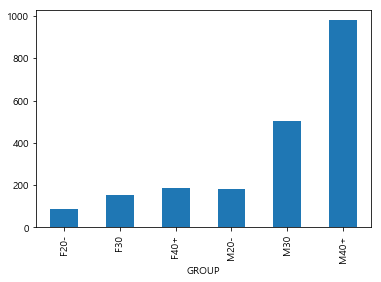

In [139]:
a.plot.bar()

In [55]:
cs.query('ACT_NM=="쇼핑몰"')

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,SNS


In [49]:
cs.fillna(0)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,SNS
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,0.000000
1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS,0.000003
2,1,2012081116,joongang.joinsmsn.com,2.0,5.0,중앙일보,뉴스/미디어,일간지,종합일간지,0.000000
3,1,2012090304,news.naver.com,5.0,504.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,0.000000
4,1,2012090506,news.nate.com,1.0,0.0,네이트 뉴스,뉴스/미디어,인터넷신문,포털뉴스,0.000000
5,1,2012091004,plus.google.com,2.0,66.0,구글 Plus,커뮤니티,블로그/SNS,SNS,0.000131
6,1,2012092017,plus.google.com,2.0,23.0,구글 Plus,커뮤니티,블로그/SNS,SNS,0.000407
7,1,2012122801,news.naver.com,3.0,213.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,0.000000
8,1,2012123114,search.naver.com,1.0,0.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,0.000000
9,1,2013061008,blog.naver.com,1.0,46.0,네이버 블로그,커뮤니티,블로그/SNS,포털블로그,0.000000


In [43]:
cs["SNS"] = sns

In [44]:
cs.head(2)

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,SNS
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,NaN
1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS,0.000003


In [39]:
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()

변수 만들거 --
여자 , 남자 
20대 , 30대, 40대
6개 별 -- 총 11개 열 

In [ ]:
# 남 , 녀 별 

In [155]:
aboy = all.query('GENDER=="M"')
lookboy = all.query('GENDER=="M"').groupby(all.ACT_NM).ST_TIME.sum()

In [170]:
lookboy.sort_values(ascending=False).tail(15)

ACT_NM
컴퓨터 렌탈/임대    7.0
선물/옵션        6.0
유럽           6.0
보트/요트        4.0
외과           3.0
불교인터넷방송      3.0
대체의학         3.0
비디오/DVD제작    2.0
수학           2.0
방송/영상장비      1.0
한자교육전문       1.0
종교학          1.0
액션/어드벤처      0.0
미술학원         0.0
법학           0.0
Name: ST_TIME, dtype: float64

In [165]:
aboy = all.query('GENDER=="F"')
lookboy = all.query('GENDER=="F"').groupby(all.ACT_NM).ST_TIME.sum()

In [171]:
lookboy.sort_values(ascending=False).tail(15)

ACT_NM
컴퓨터 렌탈/임대    7.0
선물/옵션        6.0
유럽           6.0
보트/요트        4.0
외과           3.0
불교인터넷방송      3.0
대체의학         3.0
비디오/DVD제작    2.0
수학           2.0
방송/영상장비      1.0
한자교육전문       1.0
종교학          1.0
액션/어드벤처      0.0
미술학원         0.0
법학           0.0
Name: ST_TIME, dtype: float64

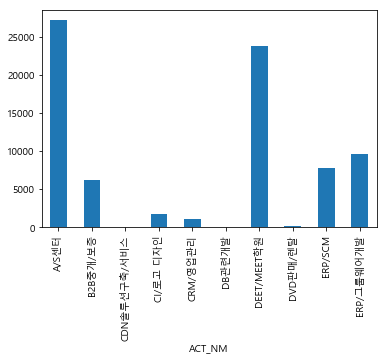

In [166]:
lookboy.head(10).plot.bar()

In [ ]:
# AS센터 체류시간이 길다 --> 그룹 별 분석해보기 

In [148]:
lookboy.head(2)

,CUS_ID,TIME_ID,SITE_CNT,ST_TIME,SNS
ACT_NM,,,,,
A/S센터,380827,696346661337,2353.0,77903.0,0.0
B2B중개/보증,63242,68426404938,153.0,5164.0,0.0


In [ ]:
lookboy.head(5).plot.bar()

In [133]:
q1w2=[]
for column in k.columns:
    if column not in k_test.columns:
        q1w2.append(column)
q1w2e3=[]
for column in k_test.columns:
    if column not in k.columns:
        q1w2e3.append(column)
#q1w2e3r4=[]
#for column in l.columns:
 #   if column not in l_test.columns:
        q1w2e3r4.append(column)
#q1w2e3r4t5=[]
#for column in l_test.columns:
#    if column not in l.columns:
 #       q1w2e3r4t5.append(column)

k=k.drop(q1w2, axis=1)
k_test=k_test.drop(q1w2e3, axis=1)


k1=k.drop("CUS_ID", axis=1)
k2= k1.div(k1.sum(axis=1),axis=0)
k2['CUS_ID']=k.CUS_ID

k1_test=k_test.drop("CUS_ID", axis=1)
k2_test= k1_test.div(k1_test.sum(axis=1),axis=0)
k2_test['CUS_ID']=k_test.CUS_ID   

finalX = pd.merge(finalX,k2,on="CUS_ID")

# word2vec 성능확인

In [165]:
act_w = pd.read_csv("actw2v.csv",encoding="UTF-8")
act_tw = pd.read_csv("actw2v_t.csv",encoding="UTF-8")

mact_w = pd.read_csv("mactw2v.csv",encoding="UTF-8")
mact_tw = pd.read_csv("mactw2v_t.csv",encoding="UTF-8")

bact_w = pd.read_csv("bactw2v.csv",encoding="UTF-8")
bact_tw = pd.read_csv("bactw2v_t.csv",encoding="UTF-8")

site_w = pd.read_csv("namew2v.csv",encoding="UTF-8")
site_tw = pd.read_csv("namew2v_t.csv",encoding="UTF-8")

In [166]:
finalX=pd.merge(act_w,mact_w, on="CUS_ID")

finalX=pd.merge(bact_w,finalX, on="CUS_ID")

finalX=pd.merge(site_w,finalX, on="CUS_ID")

finalX.head(2)

,nM40+,nM30,nF30,nF40+,nF20-,nM20-,CUS_ID,bM40+,bM30,bF30,...,aF30,aF40+,aF20-,aM20-,mM40+,mM30,mF30,mF40+,mF20-,mM20-
0,0.258779,0.104072,-0.012115,0.082049,0.067212,0.029104,1,-0.067102,-0.036729,-0.037393,...,-0.060013,-0.035398,0.010963,0.028404,-0.168828,-0.004995,0.014014,0.141313,-0.000062,-0.111026
1,0.038754,0.152332,0.142827,0.044508,0.209852,0.092025,2,-0.019582,-0.021473,-0.046755,...,0.116926,0.001115,0.132733,0.090044,-0.181137,-0.005767,0.019706,0.129198,-0.001828,-0.125021


In [167]:
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()
sns = cs.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns = sns/time
cs["SNS"] = sns
cs = cs.fillna(0)

time_t = cs_test.groupby(['CUS_ID'])["ST_TIME"].sum()
sns_t = cs_test.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns_t = sns_t/time
cs_test["SNS"] = sns_t
cs_test = cs_test.fillna(0)

man = cs.query("ACT_NM==['스포츠베팅','남성의류쇼핑몰','자동차정보','비뇨기과']").ST_TIME
man = sns/time
cs["MAN"] = man


man_t = cs_test.query("ACT_NM==['스포츠베팅','남성의류쇼핑몰','자동차정보','비뇨기과']").ST_TIME
man_t = man_t/time_t
cs_test["MAN"] = man_t

woman = cs.query("ACT_NM==['여성의류쇼핑몰' , '화장품브랜드쇼핑몰' , '폰트/서체 ']").ST_TIME
woman = woman/time
cs["WOMAN"] = woman
cs=cs.fillna(0)


woman_t = cs_test.query("ACT_NM==['여성의류쇼핑몰' , '화장품브랜드쇼핑몰' , '폰트/서체']").ST_TIME
woman_t = woman_t/time_t
cs_test["WOMAN"] = woman_t
cs_test = cs_test.fillna(0)



In [168]:
finalX["SNS"] = cs["SNS"]
finalX["MAN"] = cs["MAN"]
finalX["WOMAN"] = cs["WOMAN"]
finalX_test["SNS"] = cs_test["SNS"]
finalX_test["MAN"] = cs_test["MAN"]
finalX_test["WOMAN"] =cs_test["WOMAN"]

In [169]:
finalX["m40M"] = cs.query("MACT_NM==['가전','인터넷신문','일간지','전문뉴스']")["ST_TIME"].sum()
finalX_test["m40M"] = cs_test.query("MACT_NM==['가전','인터넷신문','일간지','전문뉴스']")["ST_TIME"].sum()

finalX["m30F"] = cs.query("MACT_NM==['성인','임신/출산' ,'입찰']")["ST_TIME"].mean()
finalX_test["m30F"] = cs_test.query("MACT_NM==['성인','임신/출산','입찰']")["ST_TIME"].mean()

finalX["m30M"] = cs.query("MACT_NM==['기업금융', '게임대회/리그','교사/교수']")["ST_TIME"].mean()
finalX_test["m30M"] = cs_test.query("MACT_NM==['기업금융', '게임대회/리그','교사/교수']")["ST_TIME"].mean()

finalX["m20F"] = cs.query("MACT_NM==['연예인/스타 ,약학']")["ST_TIME"].mean()
finalX_test["m20F"] = cs_test.query("MACT_NM==['연예인/스타 ,약학']")["ST_TIME"].mean()


In [170]:
finalX["s20F"]=cs.query("SITE_NM==['리치옥션' , '수박씨닷컴' ,'엘지에이치샵']")["ST_TIME"].sum()
finalX_test["s20F"]=cs_test.query("SITE_NM==['리치옥션' ,'수박씨닷컴' ,'엘지에이치샵']")["ST_TIME"].sum()
finalX["s20M"]=cs.query("SITE_NM==['캅스파', '실버카페']")["ST_TIME"].sum()
finalX_test["s20M"]=cs_test.query("SITE_NM==['캅스파', '실버카페']")["ST_TIME"].sum()

finalX["s40FM"]=cs.query("SITE_NM==['다음' , '다음 메일', '미디어다음' ]")["ST_TIME"].mean()
finalX_test["s40FM"]=cs_test.query("SITE_NM==['다음' , '다음 메일', '미디어다음 ']")["ST_TIME"].mean()

finalX["s20FM"]=cs.query("SITE_NM==['YouTube']")["ST_TIME"].mean()
finalX_test["s20FM"]=cs_test.query("SITE_NM==['YouTube']")["ST_TIME"].mean()

finalX["s20FM2"]=cs.query("SITE_NM==['페이스북']")["ST_TIME"].mean()
finalX_test["s20FM2"]=cs_test.query("SITE_NM==['페이스북']")["ST_TIME"].mean()


In [171]:
actwtv=pd.read_csv("act_w2v.csv")

In [54]:
actwtv_test=pd.read_csv("act_test_w2v.csv")

In [99]:
act_w.head(1)

,aM40+,aM30,aF30,aF40+,aF20-,aM20-,CUS_ID
0,0.112928,0.011892,-0.060013,-0.035398,0.010963,0.028404,1


In [172]:
finalX=pd.merge(finalX,actwtv,on="CUS_ID")

In [173]:
a=pd.pivot_table(cs, index="CUS_ID", columns="BACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
a1=a.drop("CUS_ID", axis=1)
a2= a1.div(a1.sum(axis=1),axis=0)
a2['CUS_ID']=a.CUS_ID 
a_test=pd.pivot_table(cs_test, index="CUS_ID", columns="BACT_NM", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
a1_test=a_test.drop("CUS_ID", axis=1)
a2_test= a1_test.div(a1_test.sum(axis=1),axis=0)
a2_test['CUS_ID']=a_test.CUS_ID 
                        #카테고리별 체류시간 

In [174]:
finalX=pd.merge(finalX,a2,on="CUS_ID")

In [175]:
finalX.head(2)

,nM40+,nM30,nF30,nF40+,nF20-,nM20-,CUS_ID,bM40+,bM30,bF30,...,엔터테인먼트,여행,온라인교육,유통/판매/운송,인터넷/컴퓨터,정보통신/IT,정치/행정,제조,커뮤니티,학문
0,0.258779,0.104072,-0.012115,0.082049,0.067212,0.029104,1,-0.067102,-0.036729,-0.037393,...,0.205007,0.001265,0.014903,0.000000,0.263712,0.000000,0.000039,0.000000,0.220245,0.0
1,0.038754,0.152332,0.142827,0.044508,0.209852,0.092025,2,-0.019582,-0.021473,-0.046755,...,0.015146,0.002911,0.000664,0.001803,0.350839,0.005936,0.000795,0.001155,0.089155,0.0


기본 외 변수 추가하가( 다른 파일에서 다녀옴 ) 

In [ ]:
time = cs.groupby(['CUS_ID'])["ST_TIME"].sum()
sns = cs.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns = sns/time
cs["SNS"] = sns
cs = cs.fillna(0)

time_t = cs_test.groupby(['CUS_ID'])["ST_TIME"].sum()
sns_t = cs_test.query("ACT_NM==['아프리카','SNS']").ST_TIME
sns_t = sns_t/time
cs_test["SNS"] = sns_t
cs_test = cs_test.fillna(0)
man = cs.query("ACT_NM==['스포츠베팅','남성의류쇼핑몰','자동차정보','비뇨기과']").ST_TIME
man = sns/time
cs["MAN"] = man


man_t = cs_test.query("ACT_NM==['스포츠베팅','남성의류쇼핑몰','자동차정보','비뇨기과']").ST_TIME
man_t = man_t/time_t
cs_test["MAN"] = man_t
woman = cs.query("ACT_NM==['여성의류쇼핑몰' , '화장품브랜드쇼핑몰' , '폰트/서체 ','임부복쇼핑몰']").ST_TIME
woman = woman/time
cs["WOMAN"] = woman
cs=cs.fillna(0)


woman_t = cs_test.query("ACT_NM==['여성의류쇼핑몰' , '화장품브랜드쇼핑몰' , '폰트/서체 ','임부복쇼핑몰']").ST_TIME
woman_t = woman_t/time_t
cs_test["WOMAN"] = woman_t
cs_test = cs_test.fillna(0)
finalX["SNS"] = cs["SNS"]
finalX["MAN"] = cs["MAN"]
finalX["WOMAN"] = cs["WOMAN"]
finalX_test["SNS"] = cs_test["SNS"]
finalX_test["MAN"] = cs_test["MAN"]
finalX_test["WOMAN"] =cs_test["WOMAN"]

In [176]:
X=finalX.drop("CUS_ID", axis=1)

In [89]:

X=finalX.drop("CUS_ID", axis=1)
X_test1=finalX_test.drop("CUS_ID", axis=1)
y=pf.GROUP

In [140]:
X.head(1)

,nM40+,nM30,nF30,nF40+,nF20-,nM20-,bM40+,bM30,bF30,bF40+,...,환경기관/단체,환경뉴스,환경운동/캠페인,휠타이어쇼핑몰,휴대폰 커뮤니티,휴대폰/모바일단말기,휴대폰결제,휴대폰브랜드,휴대폰쇼핑몰,휴대폰악세사리쇼핑몰
0,0.258779,0.104072,-0.012115,0.082049,0.067212,0.029104,-0.067102,-0.036729,-0.037393,-0.080257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
skw2v = pd.read_csv("sk_word.csv")
finalX = pd.merge(finalX,skw2v,on="CUS_ID")

In [155]:
cs['연도']=cs.TIME_ID//1000000
cs_test['연도']=cs_test.TIME_ID//1000000
cs['월']=cs.TIME_ID%1000000//10000
cs_test['월']=cs_test.TIME_ID%1000000//10000
cs['일']=cs.TIME_ID%10000//100
cs_test['일']=cs_test.TIME_ID%10000//100
cs['시간']=cs.TIME_ID%100
cs_test['시간']=cs_test.TIME_ID%100
a=cs.TIME_ID//100
b=cs_test.TIME_ID//100
cs['요일']=pd.to_datetime(a.astype(str)).dt.weekday.map({0:'월요일',1:'화요일',2:'수요일',3:'목요일',4:'금요일',5:'토요일',6:'일요일'})
cs_test['요일']=pd.to_datetime(b.astype(str)).dt.weekday.map({0:'월요일',1:'화요일',2:'수요일',3:'목요일',4:'금요일',5:'토요일',6:'일요일'})
def time(x):
    if (0<=x<=5):
        return "새벽"
    elif (6<=x<=11):
        return "오전"
    elif (12<=x<=17):
        return "오후"
    elif (18<=x<=23):
        return "밤"
cs['시간대']=cs.시간.apply(time)
cs_test['시간대']=cs_test.시간.apply(time)
cs['연월일']=cs.TIME_ID//100           
cs_test['연월일']=cs_test.TIME_ID//100

In [156]:
n=cs.groupby("CUS_ID")["ST_TIME"].sum()
n_test=cs_test.groupby("CUS_ID")["ST_TIME"].sum()             #총 체류시간
o=cs.groupby("CUS_ID")['SITE_CNT'].sum()
o_test=cs_test.groupby("CUS_ID")['SITE_CNT'].sum()             #총 페이지뷰 횟수
p=cs.groupby("CUS_ID")['SITE_NM'].nunique()
p_test=cs_test.groupby("CUS_ID")['SITE_NM'].nunique()            #서로 다른 사이트
q=cs.groupby("CUS_ID")['BACT_NM'].nunique()
q_test=cs_test.groupby("CUS_ID")['BACT_NM'].nunique()           #서로다른 카테고리
r=cs.groupby("CUS_ID")["연월일"].nunique()
r_test=cs_test.groupby("CUS_ID")["연월일"].nunique()              #몇일동안 점속했는가
s=n/r
s_test=n_test/r_test   

In [179]:
finalX=pd.merge(finalX, ag, on="CUS_ID")
finalX=pd.merge(finalX, kl, on='CUS_ID')
finalX=pd.merge(finalX, ce, on='CUS_ID')
finalX['총체류시간']=n.values
finalX['총페이지뷰']= o.values
finalX['사이트수']= p.values
finalX['카테고리수']=q.values
finalX['접속일수']=r.values
finalX['일평균시간']=s.values

In [191]:
g=pd.pivot_table(cs, index="CUS_ID", columns="시간대", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
g1=g.drop("CUS_ID", axis=1)
g2= g1.div(g1.sum(axis=1),axis=0)
g2['CUS_ID']=g.CUS_ID
g_test=pd.pivot_table(cs_test, index="CUS_ID", columns="시간대", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
g1_test=g_test.drop("CUS_ID", axis=1)
g2_test= g1_test.div(g1_test.sum(axis=1),axis=0)
g2_test['CUS_ID']=g_test.CUS_ID

In [197]:
finalX= pd.merge(finalX,c2,on="CUS_ID")

In [198]:
finalX= pd.merge(finalX,g2,on="CUS_ID")

In [190]:
c=pd.pivot_table(cs, index="CUS_ID", columns="월", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
c1=c.drop("CUS_ID", axis=1)
c2= c1.div(c1.sum(axis=1),axis=0)
c2['CUS_ID']=c.CUS_ID
c_test=pd.pivot_table(cs_test, index="CUS_ID", columns="월", values="ST_TIME", aggfunc=sum, fill_value=0).reset_index()
c1_test=c_test.drop("CUS_ID", axis=1)
c2_test= c1_test.div(c1_test.sum(axis=1),axis=0)
c2_test['CUS_ID']=c_test.CUS_ID 

In [196]:
X.head(1)

,nM40+,nM30,nF30,nF40+,nF20-,nM20-,bM40+,bM30,bF30,bF40+,...,11,12,평일,주말,총체류시간,총페이지뷰,사이트수,카테고리수,접속일수,일평균시간
0,0.258779,0.104072,-0.012115,0.082049,0.067212,0.029104,-0.067102,-0.036729,-0.037393,-0.080257,...,0.002215,0.007378,0.790808,0.209192,357978.0,13656.0,201,16,205,1746.234146


In [199]:
X=finalX.drop("CUS_ID", axis=1)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [182]:
kfold = StratifiedKFold(n_splits=5)

In [54]:
xgb1 = XGBClassifier()

xgb_param_grid = {'n_estimators' : [100,200],
                 'learniing_rate' : [0.1,0.05],
                 'gamma' : [0,5],
                 'max_depth' : [8,6],
                 'min_child_weight' : [8,6],
                 'colsample_bytree' : [0.5,1],
                 'subsample' : [0.5,1]}

XGB = RandomizedSearchCV(xgb1,param_distributions = xgb_param_grid, n_iter = 20, cv=kfold, scoring="accuracy", verbose = 1)
XGB.fit(X_train,y_train)
XGB_best = XGB.best_estimator_

# Best score
display(XGB.best_score_, XGB_best)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.8min finished


0.2928

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=5,
       learniing_rate=0.05, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=8, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [201]:
xgv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=5,
       learniing_rate=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=8, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [202]:
xgv.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=5,
       learniing_rate=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=8, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [205]:
X.head(1)

,nM40+,nM30,nF30,nF40+,nF20-,nM20-,bM40+,bM30,bF30,bF40+,...,7_y,8_y,9_y,10_y,11_y,12_y,밤,새벽,오전,오후
0,0.258779,0.104072,-0.012115,0.082049,0.067212,0.029104,-0.067102,-0.036729,-0.037393,-0.080257,...,0.336049,0.315204,0.195847,0.025443,0.002215,0.007378,0.164273,0.350874,0.248342,0.236512


In [204]:
accuracy_score(xgv.predict(X_test), y_test)

0.2384

In [ ]:
# w2v + sns act 
# mcat 추가하니까 0.2384
# 0.256 w2v + sns + 즈영오빠 w2v
#    0.256 내꺼4개 + 주영오빠꺼 + act랑 mact 
#위에꺼 + 주말 평일 -> 주말평일 없애기 
# mact, bact, act, 랑  
# 위에꺼 + 월별 